$$-\Delta u = 100 \sin(\pi x)$$ in $\Omega$ with $u = 0$ on $\partial \Omega.$



Exact solution: $$u(x) = \dfrac{100 \sin(\pi x)}{\pi^2}$$

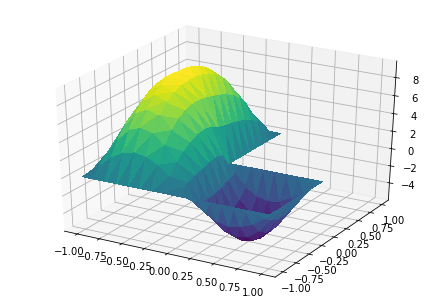

In [19]:
import numpy as np
from skfem import *
from skfem.models.poisson import laplace, unit_load
from skfem import LinearForm


@LinearForm
def loading(v, w):
    return(-100*np.sin(np.pi * w.x[0]) * v)

m = MeshTri.init_lshaped()
m.refine(3)

e = ElementTriP1()
basis = InteriorBasis(m, e)

A = asm(laplace, basis)
b = asm(loading, basis)

x = solve(*condense(A, b, I=m.interior_nodes()))

if __name__ == "__main__":
    from os.path import splitext
    from sys import argv
    from skfem.visuals.matplotlib import plot3, show
    plot3(m, x)
    show()

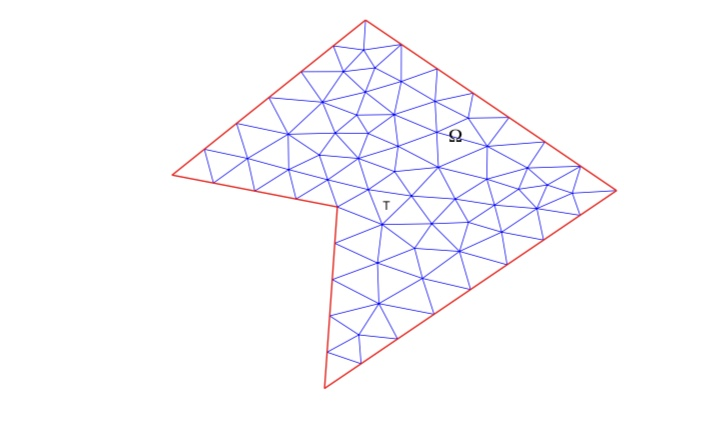

In [16]:
from IPython.display import Image
Image(filename ="/Users/nikosmatsavelas/Desktop/IMG_8354.jpg")

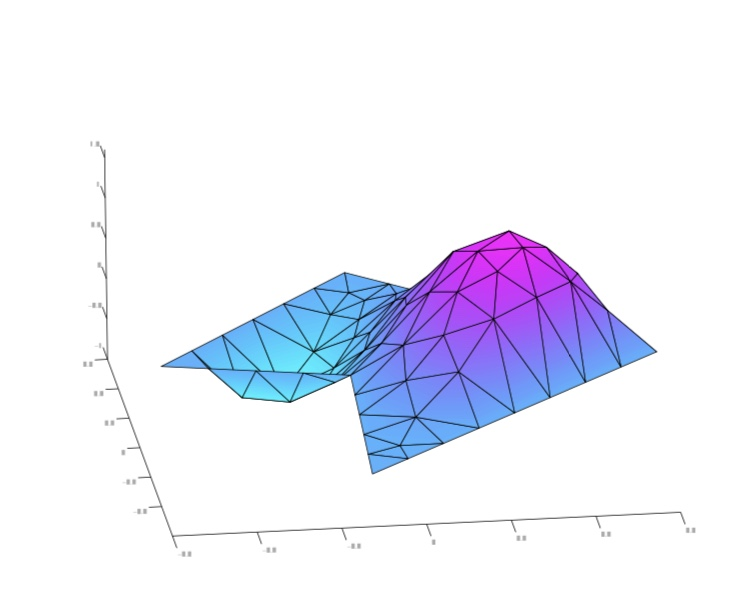

In [17]:
from IPython.display import Image
Image(filename ="/Users/nikosmatsavelas/Desktop/IMG_8351.jpg")

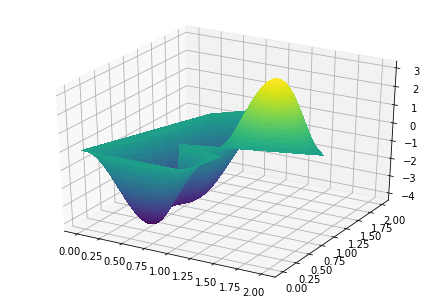

In [25]:
import dmsh

geo = dmsh.Polygon(
    [
        [0.0, 0.0],
        [1.1, 0.0],
        [1.2, 0.5],
        [0.7, 0.6],
        [2.0, 1.0],
        [1.0, 2.0],
        [0.5, 1.5],
    ]
)
X, cells = dmsh.generate(geo, 0.1)
m = MeshTri(X.T, cells.T)
m.refine(3)

e = ElementTriP1()
basis = InteriorBasis(m, e)

A = asm(laplace, basis)
b = asm(loading, basis)

x = solve(*condense(A, b, I=m.interior_nodes()))

if __name__ == "__main__":
    from os.path import splitext
    from sys import argv
    from skfem.visuals.matplotlib import plot3, show
    plot3(m, x)
    show()